## 2D function optimization demonstration
### Himmelblau function
$$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$$

![himmelblau function 3d](./resources/Himmelblau_function.svg.png)
![himmelblau function 3d](./resources/Himmelblau_contour.svg.png)

### Minima
- $f(3.0,2.0)=0.0$
- $f(-2.805118,3.131312)=0.0$
- $f(-3.779310,-3.283186)=0.0$
- $f(3.584428,-1.848126)=0.0$

x,r range:  (120,) (120,)
X,Y maps:  (120, 120) (120, 120)


/tmp/ipykernel_26460/779053740.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


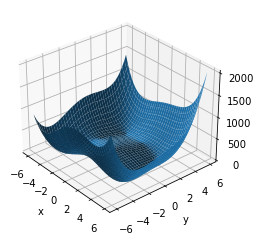

In [4]:
# function implementation
def himmeblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


# plot
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,r range: ', x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print('X,Y maps: ', X.shape, Y.shape)
Z = himmeblau([X, Y])

fig = plt.figure('himmeblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(30, -40)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [8]:
# Gradient descent
import torch

# [1.,0.], [-4.,0.], [4.,0.]
x = torch.tensor([4., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)  # specify the parameter [x]
for step in range(20000):
    pred = himmeblau(x)
    optimizer.zero_grad()
    pred.backward()
    optimizer.step()

    if step % 2000 == 0:
        print('step {} x={}, f(x)={}'
              .format(step, x.tolist(), pred.item()))


step 0 x=[3.999000072479248, -0.0009999999310821295], f(x)=34.0
step 2000 x=[3.5741987228393555, -1.7641836404800415], f(x)=0.09904662519693375
step 4000 x=[3.5844225883483887, -1.8481197357177734], f(x)=2.1100277081131935e-09
step 6000 x=[3.5844264030456543, -1.8481241464614868], f(x)=2.41016095969826e-10
step 8000 x=[3.58442759513855, -1.848125696182251], f(x)=2.9103830456733704e-11
step 10000 x=[3.584428310394287, -1.8481262922286987], f(x)=9.094947017729282e-13
step 12000 x=[3.584428310394287, -1.8481265306472778], f(x)=0.0
step 14000 x=[3.584428310394287, -1.8481265306472778], f(x)=0.0
step 16000 x=[3.584428310394287, -1.8481265306472778], f(x)=0.0
step 18000 x=[3.584428310394287, -1.8481265306472778], f(x)=0.0
